<a href="https://colab.research.google.com/github/Sypirjade/YES-BANK-STOCK-PREDICTION/blob/main/saniya_YesBankStockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YES BANK STOCK PREDICTION**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

• First of all we have loaded the datafile which we were given in csv format

• Next we uses head, taiI, describe and info methods to understand our dataset

• After understanding, we cleaned the dataset in which we checked nuII,dupIicate
values and also changed the Date column into the correct data format.

• While cleaning we came to know that there was no null and duplicate values
were present in the given dataset.

• Next we have done Exploratory Data Analysis in which we have checked the
distribution of all independent variables which were right skewed and hence we
performed log transformation to make it normal .

• We check the relationship between dependent and independent variables using
a scatter plot which shows that dependent and independent variables were
highly correlated.

• After EDA we started with Model Implementation in which first of all we split our
data set into train set and test set.80% of data used as train set and 20% as test
set.

• We have implemented total 5 Regression models(Linear Regression , Lasso
Regression, Ridge Regression ,Elastic Net Regression and XG Boost
Regression )

• We used evaluation marics to compare all these models.

• We performed Cross Validation on models to check the effectiveness of models


# **GitHub Link -**https://github.com/Sypirjade/YES-BANK-STOCK-PREDICTION

# **Problem Statement**


** YES Bank is a well-known bank in the Indian financial domain. Since 2018, it
has been in the news because of the fraud case involving Rana Kapoor.
We were interested to know that either ML model can predict the impact on stock price due to
any fraud cases.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import math


from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:

#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading dataset
file_path = '/content/drive/MyDrive/data_YesBank_StockPrices.csv'
df=pd.read_csv(file_path)

### Dataset First View

In [ ]:
# Dataset First Look
#Checking first 10 rows of dataset using head()method
df.head(10)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


In [ ]:
df.tail(5)

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

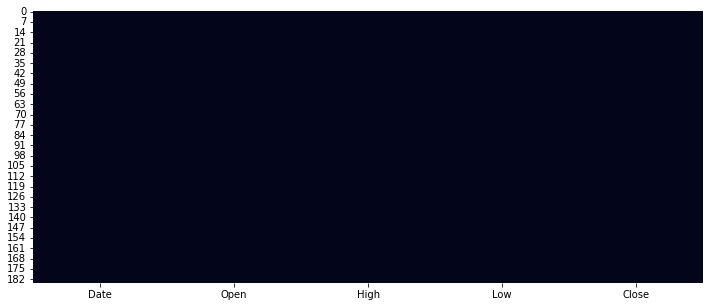

In [ ]:
# Visualizing the missing values
#plotting missing values in heatmap
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?



1.   **There is 185 rows and 4 columns in the dataset**
2.   **No duplicate values present**
3.   **No missing values present**



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description 

Date:The date of record finalizes the transfer of the stock's ownership.

Open: Open Price is the price at which the financial security opens in the market when trading begins. It may or may not be different from the previous day's closing price. The security may open at a higher price than the closing price due to excess demand of the security.

High:High is the highest price at which a stock traded during a period.

Low:Low is the lowest price at which a stock traded during a period.

Close:The closing price of a stock is the price at which the share closes at the end of trading hours of the stock market.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(df.nunique())

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df['Date'].head()

0    Jul-05
1    Aug-05
2    Sep-05
3    Oct-05
4    Nov-05
Name: Date, dtype: object

In [ ]:
#Lets convert Date into correct format
from datetime import datetime
df['Date']=df['Date'].apply(lambda x: datetime.strptime(x,"%b-%y"))

In [ ]:
df['Date'].head()

0   2005-07-01
1   2005-08-01
2   2005-09-01
3   2005-10-01
4   2005-11-01
Name: Date, dtype: datetime64[ns]

### What all manipulations have you done and insights you found?



1.   **Dealt with missing values**
2.   **As Date is in format of MM-YY, so converted it into correct format of YYYY-MM-DD using strptime of the datetime library.**






## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

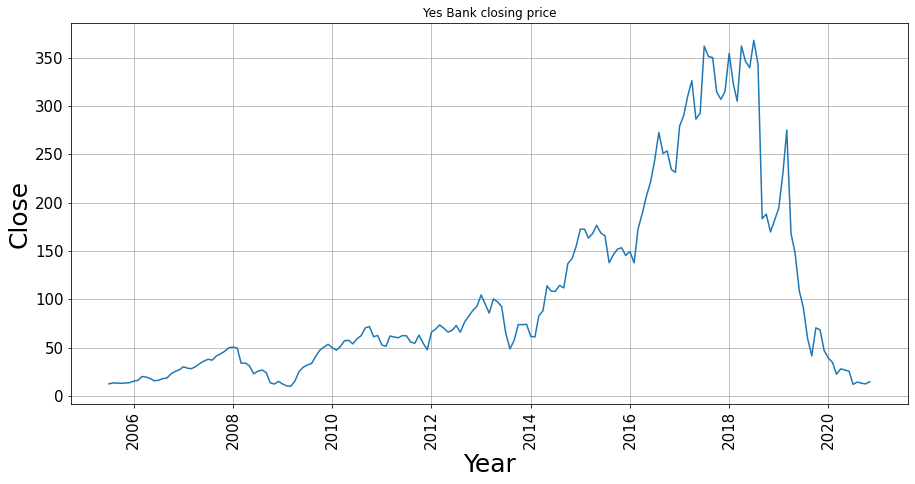

In [ ]:
# Chart - 1 visualization code
#Lets check the trend of our target variable(Closing)
plt.figure(figsize=(15,7))                    #Setting the figure size
sns.lineplot(x='Date',y='Close',data=df).set(title='Yes Bank closing price')      
plt.xlabel('Year',fontsize=25)                #Labelling
plt.ylabel('Close',fontsize=25)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

**Post 2018 Yes Bank closing stock price is on a downward trend**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

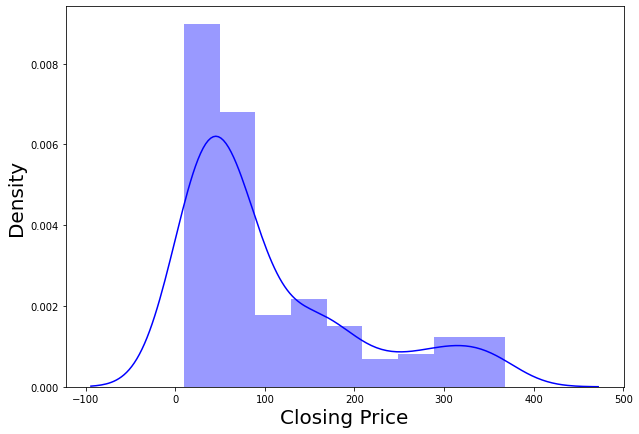

In [ ]:
# Chart - 2 visualization code
#Target/Dependent variable-'Close'
plt.figure(figsize=(10,7))
sns.distplot(df['Close'],color="b")
plt.xlabel('Closing Price',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.show()
#Distribution plot depicted the variation in the data distribution of Target variable

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?


**From above it is clear that distribution is right skewed so we have to do transformatiom to make it Normal using log transformation method.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

**Log Transformation: Log transformation is a convenient means of transforming a highly skewed variable into a more normalized dataset.**

**In this transform, we take the log of the values in a column and use these values as the column instead.**

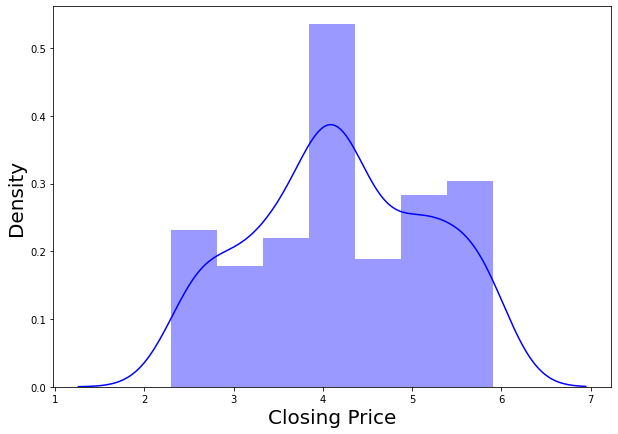

In [ ]:
#Applying log transformation on target variable 
plt.figure(figsize=(10,7))
sns.distplot(np.log(df['Close']),color="b")
plt.xlabel('Closing Price',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.show()

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
#Collecting all our numeric column in a new variable 
numeric_features=df.describe().columns
numeric_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

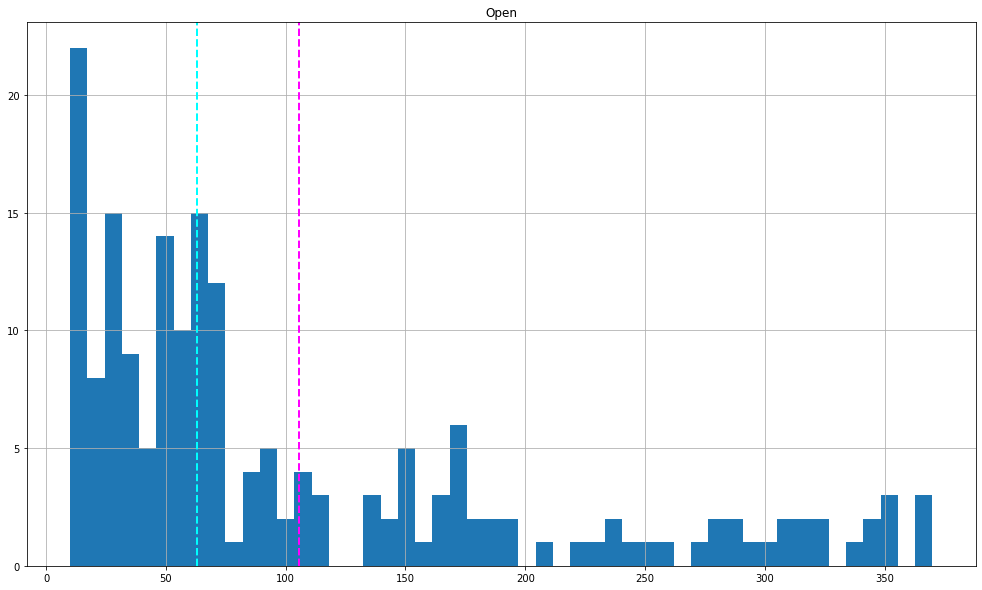

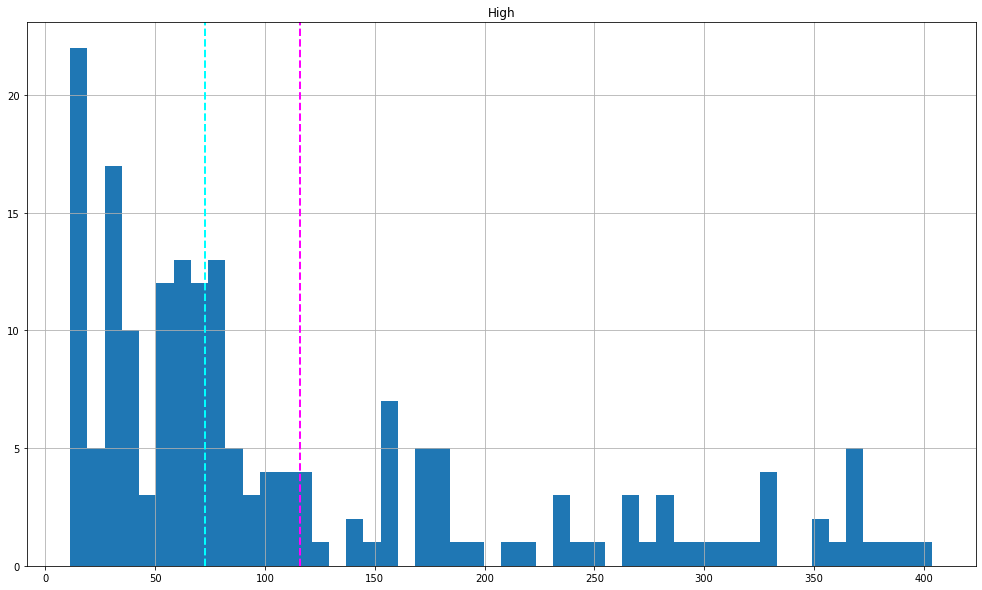

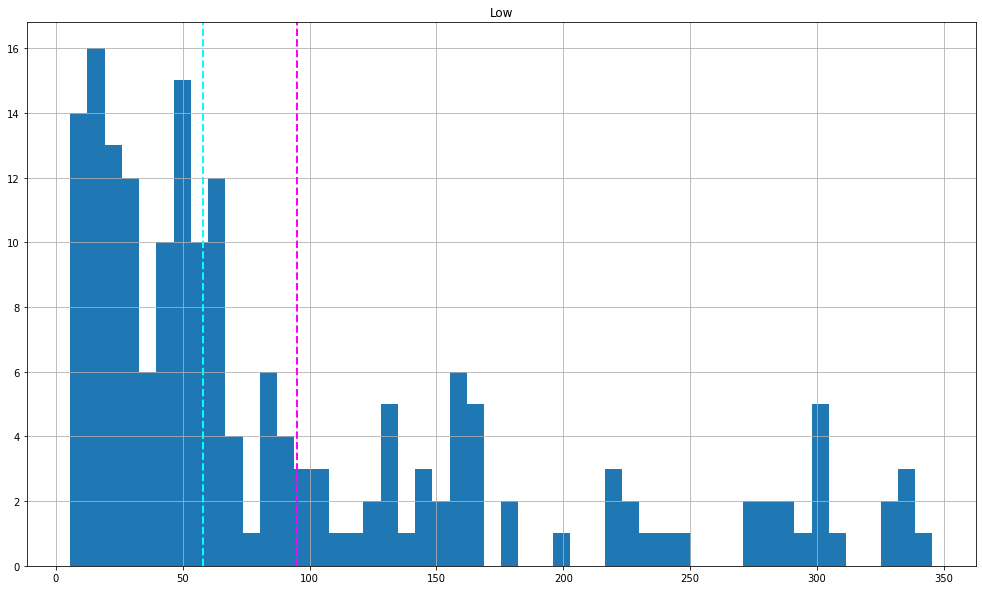

In [ ]:
#Checking the Mean, Median for all independent variable using barplot.
#Ploting bar blot for each independent variable
for col in numeric_features[:-1]:
    fig = plt.figure(figsize=(17, 10))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

**From above graph we can see that there is much difference in between mean and median for all independent variable. It means independent variables are not normally distributted.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

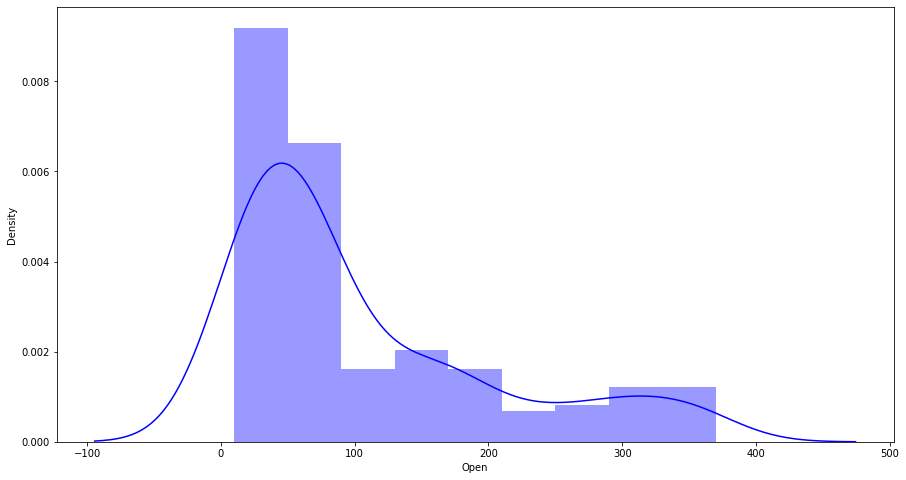

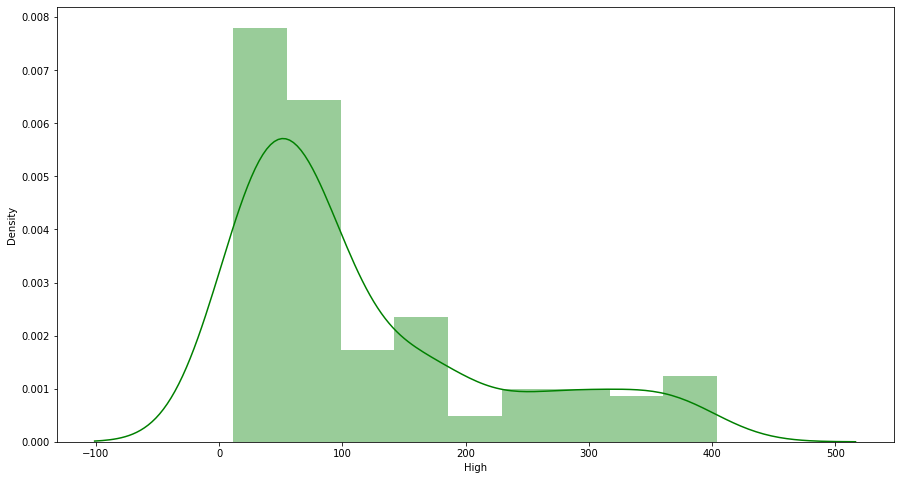

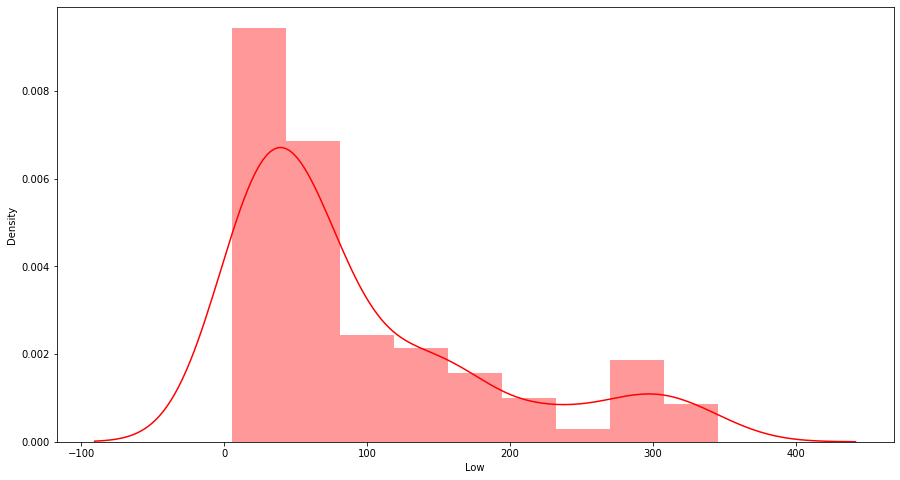

In [ ]:
# Chart - 4 visualization code
#We will check distribution using distplot for all our independent variables.
#Distribution of independent variable
plt.figure(figsize=(15,8))
sns.distplot(df['Open'], color='blue')

plt.figure(figsize=(15,8))
sns.distplot(df['High'], color='green')

plt.figure(figsize=(15,8))
sns.distplot(df['Low'], color='red')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

 **Independent varaibles of our dataset have right skwed distribution. Again we have to use log transformation to make in normal.**

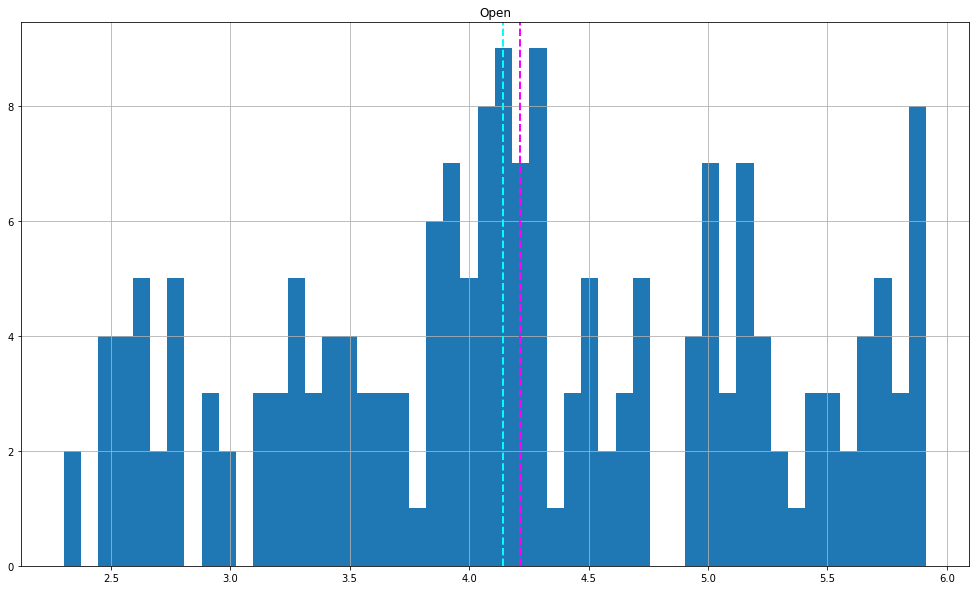

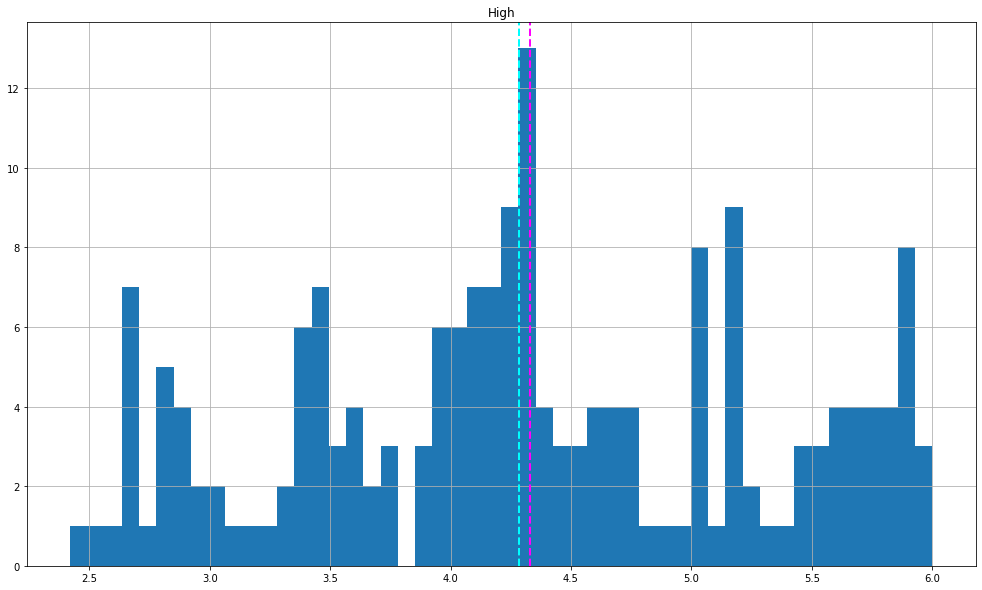

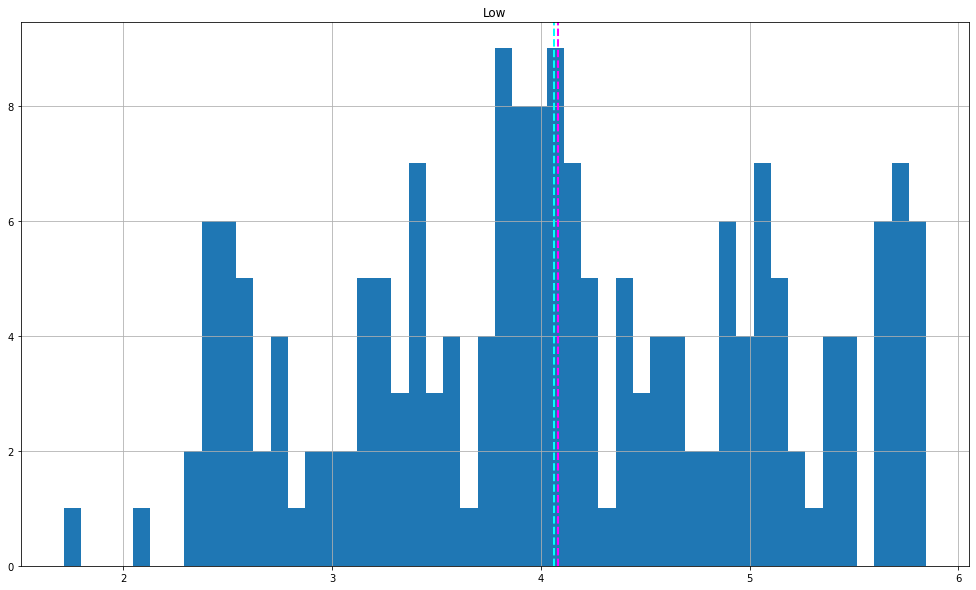

In [ ]:
#Applying log transformation
for col in numeric_features[:-1]:
    fig = plt.figure(figsize=(17, 10))
    ax = fig.gca()
    feature = np.log(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

#### Chart - 5

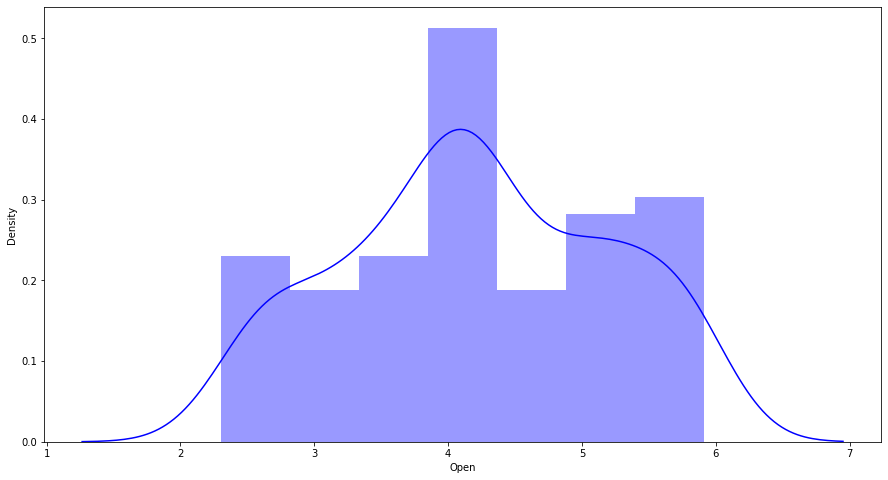

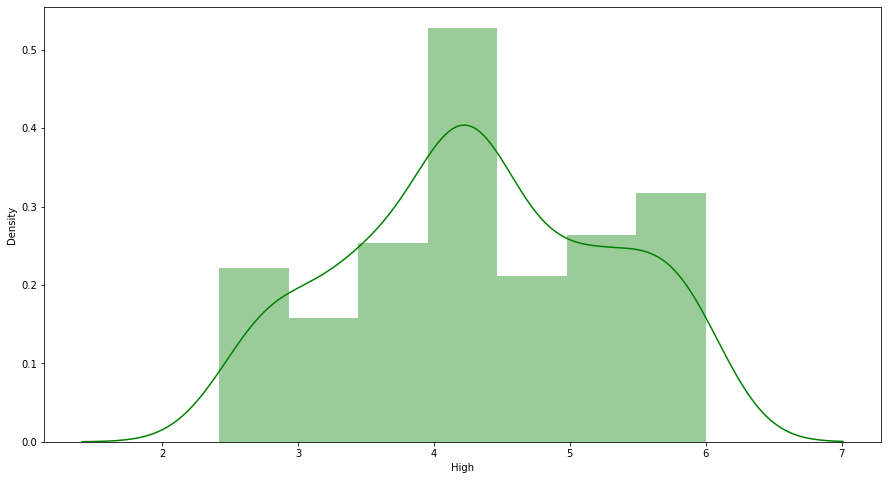

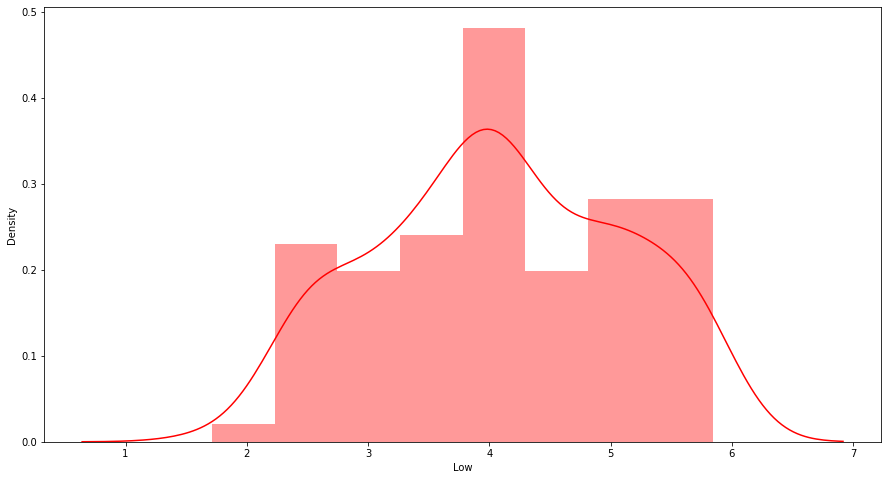

In [ ]:
# Chart - 5 visualization code
#Applying log transformation and checking distribution of independent variables.
plt.figure(figsize=(15,8))
sns.distplot(np.log(df['Open']), color='blue')

plt.figure(figsize=(15,8))
sns.distplot(np.log(df['High']), color='green')

plt.figure(figsize=(15,8))
sns.distplot(np.log(df['Low']), color='red')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

**After applying log transformation distribution of all independent variables coverted to almost Normal distribution.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

**Bivariate Analysis**



#### Chart - 6

**Now we will see the relation between dependent and independent variables using scatter plot and Heatmap**


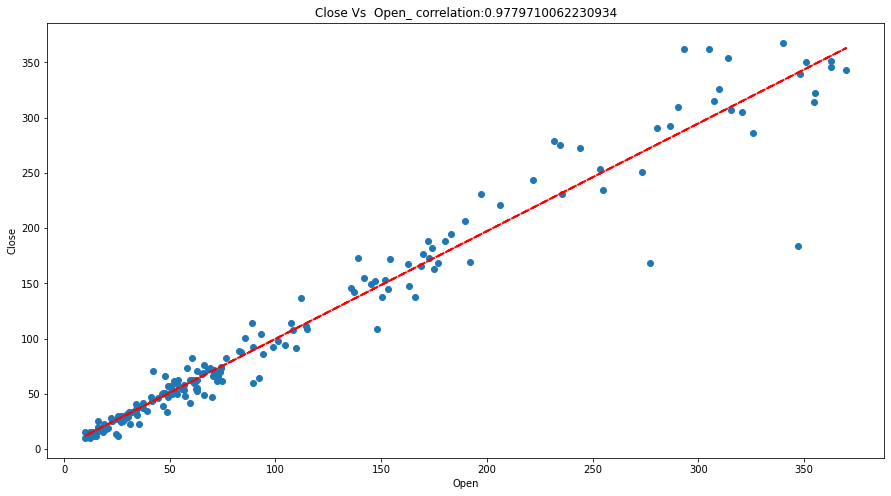

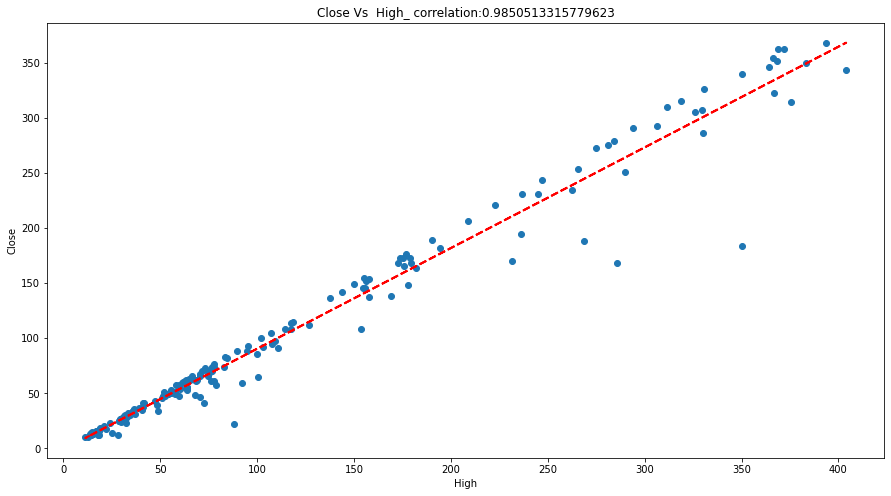

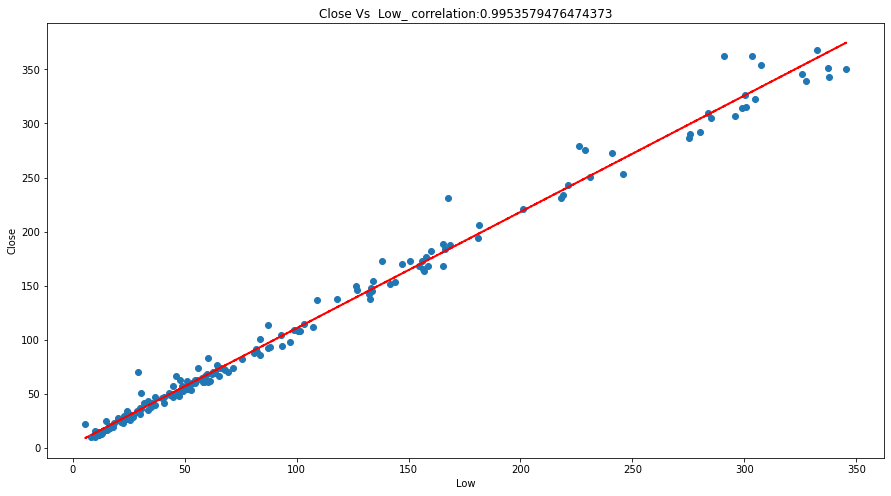

In [ ]:
# Chart - 6 visualization code
#Using scatter plot
for col in numeric_features[:-1]:
  fig = plt.figure(figsize = (15,8))
  ax = fig.gca()
  features = df[col]
  label = df['Close']
  correlation = features.corr(label)
  plt.scatter(x = features,y = label)
  plt.xlabel(col)
  plt.ylabel('Close')
  plt.title('Close Vs  ' + col + '_ correlation:' + str(correlation))
  z = np.polyfit(df[col],df['Close'],1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col] , y_hat, "r--",lw = 2)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

**From above it is clear that all independent variables are highly correlated with our dependent/target variable so we will not drop any column.**

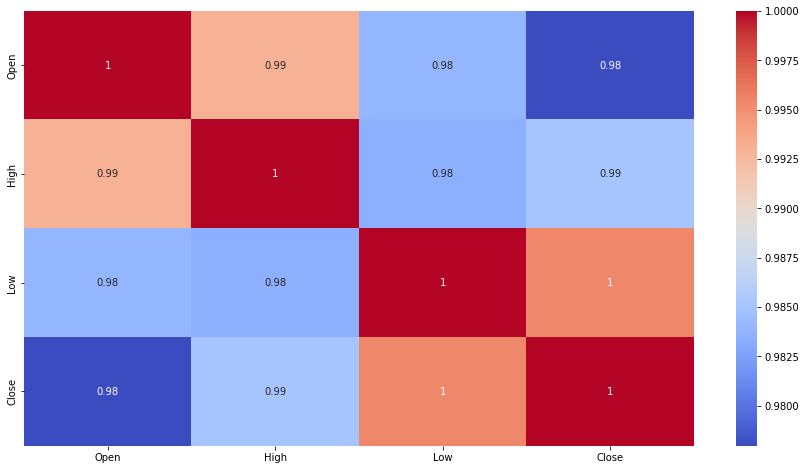

In [ ]:
#Checking Correlation using heatmap
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot = True, cmap='coolwarm')
plt.show()

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

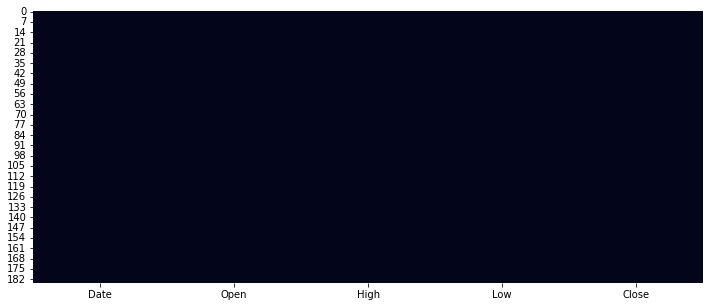

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Visualizing the missing values
#plotting missing values in heatmap
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=False)



#### What all missing value imputation techniques have you used and why did you use those techniques?

**There is no missing values in the dataset**

### 2. Feature Manipulation & Selection

#### 1. Feature Manipulation

**Checking Multicollinearity using VIF(Variance Inflation Factor)**

**Variance Inflation Factor(VIF): A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. A large VIF on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.**

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
#Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):

  # calculating VIF
  vif =pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X. shape[1])]

  return(vif)

calculate_vif(df[[i for i in df.describe().columns if i not in ['Date', 'Close']]])


,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


In [ ]:
#Checking VIF without Date and Open features
calculate_vif(df[[i for i in df.describe().columns if i not in ['Date','Open', 'Close']]])


,variables,VIF
0,High,62.598129
1,Low,62.598129


In [ ]:
#Checking VIF without Date and High features
calculate_vif(df[[i for i in df.describe().columns if i not in ['Date','High', 'Close']]])

,variables,VIF
0,Open,65.64384
1,Low,65.64384


In [ ]:
#Checking VIF without Date and Low features
calculate_vif(df[[i for i in df.describe().columns if i not in ['Date','Low', 'Close']]])

,variables,VIF
0,Open,153.215921
1,High,153.215921


#### 2. Feature Selection

1.    **we have checked VIF with dropping each features(Open,High & Low) one by one,better result of VIF was when we dropped 'Open' which was also realtively high.**
2.   **Even dropping any one feature the VIF was high. This is because of all features are highly correlated and they are equally important for closing price prediction so we are not going to dropp any column.**

3.  **As we have limited features, dropping any one of them will result in loss of important data which are essential for accurate model prediction and it will result in bad model.** 
4. **Finally we will not dropp any column and will try to predict result and will see how model is performing with multicollinearity.**


 

### 3. Data Scaling & Data Splitting

In [ ]:

#splitting between dependent and independent variable
independent_variable = df[['High','Low','Open']]

dependent_variable = df['Close']
# Scaling your data
# applying zscore to each values of independent variable 

from scipy.stats import zscore  
X = round(independent_variable.apply(zscore),3)
y=np.log10(dependent_variable)

##### Which method have you used to scale you data and why?

**Z-score normalization refers to the process of normalizing every value in a dataset such that the mean of all of the values is 0 and the standard deviation is 1**

### 4. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
#Creating Trainig and Testing set of our dataset
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print('Shape of X_train Set:',X_train.shape)
print('Shape of X_test Set:',X_test.shape)
print('Shape of y_train Set:',y_train.shape)
print('Shape of y_test Set:',y_test.shape)

Shape of X_train Set: (148, 3)
Shape of X_test Set: (37, 3)
Shape of y_train Set: (148,)
Shape of y_test Set: (37,)


##### What data splitting ratio have you used and why? 

**Here we used 80-20 split for training and testing**

## ***6. ML Model Implementation***

### ML Model - 1 **LINEAR REGRESSION**

**Linear regression** is a popular and uncomplicated algorithm used in data science and machine learning. It's a supervised learning algorithm and the simplest form of regression used to study the mathematical relationship between variables.

In [ ]:
#Fitting the model
linear_reg = LinearRegression()
linear_reg_model = linear_reg.fit(X_train,y_train)

In [ ]:
#train accuracy of linear regression model
round(linear_reg.score(X_train,y_train), 3)

0.809

In [ ]:
#test accuracy of linear regression model
round(linear_reg.score(X_test,y_test), 3)

0.828

In [ ]:
linear_reg_model.intercept_

1.8262495893435555

In [ ]:
linear_reg_model.coef_

array([ 0.29061643,  0.23265022, -0.13270791])

In [ ]:
#prediction of test data.
y_pred = linear_reg.predict(X_test)
y_pred

array([1.53276423, 1.96672923, 1.61039984, 1.95577646, 1.66713574,
       1.53291803, 2.3198133 , 1.47234925, 1.46174706, 2.27202742,
       2.59746859, 1.77196223, 2.0045669 , 1.63999469, 2.73573264,
       2.44754382, 1.69457789, 1.51594662, 2.45298264, 1.61176382,
       1.44547559, 1.87456785, 2.0156832 , 1.63781436, 2.25493358,
       1.63516541, 2.42563442, 1.46032674, 1.83171021, 1.62287589,
       2.8811247 , 2.77612524, 1.69605907, 2.0717636 , 1.56161009,
       1.59665024, 2.42253306])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

# **Evaluation Metrics**

**Evaluation metrics** are used to measure the quality of the statistical or machine learning model.
There are many different types of evaluation metrics available to test a model.In this project we will mainly use following evaluation metrics:
1. MSE(Mean Squared Error)
2. RMSE(Root Mean Squared Error)
3. MAE(Mean Absolute Error)
4. MAPE(Mean Absolute Percentage Error)
5. r2 score(R-Squared)

In [ ]:
# Test Performance of linear regression model
print("MSE :",round(mean_squared_error(y_test, y_pred), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred),3))
print("R2 :",round(r2_score(y_test, y_pred), 3))


MSE : 0.032
RMSE : 0.179
MAE : 0.146
MAPE : 0.087
R2 : 0.828


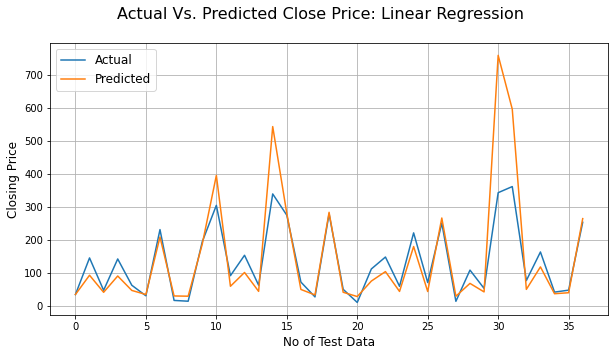

In [ ]:
# Visualizing evaluation Metric Score chart
# Actual Price vs. Predicted Price for Linear Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred))
plt.suptitle('Actual Vs. Predicted Close Price: Linear Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

### ML Model - 2 LASSO REGRESION



*  **Lasso regression** is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. 
*   Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. 

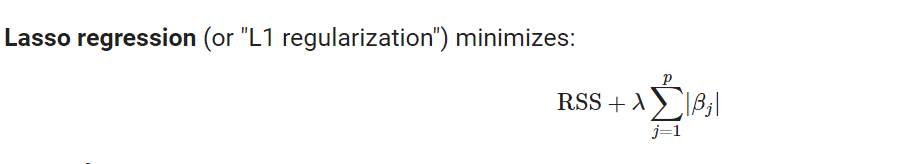

1. A tiny  λ  imposes no penalty on the coefficient size, and is equivalent to a normal linear regression.
2. Increasing  λ  penalizes the coefficients and thus shrinks them towards zero.



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#Implementing Lasso Regression
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.005,max_iter=3000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.005, max_iter=3000)

In [ ]:
#Checking Training accuracy of Lasso Regression
round(lasso.score(X_train,y_train),2)

0.81

In [ ]:
#Prediction
y_lasso_pred=lasso.predict(X_test)
y_lasso_pred

array([1.53992298, 1.97816357, 1.62561412, 1.95756734, 1.66475039,
       1.53355889, 2.32216595, 1.47850425, 1.46864626, 2.22304605,
       2.60974071, 1.78623108, 2.00770108, 1.64599023, 2.74709376,
       2.40694446, 1.69759822, 1.51948742, 2.40628295, 1.61713583,
       1.45232157, 1.87129574, 2.01597013, 1.63776444, 2.24647054,
       1.60925976, 2.42706007, 1.46755407, 1.83521861, 1.63369273,
       2.86126132, 2.69994776, 1.69190376, 2.07677726, 1.56521193,
       1.60289695, 2.41947142])

In [ ]:
#Checking the test performance of Lasso Regression Using Evaluation MAtrics
print("MSE value is :",round(mean_squared_error(y_test, y_lasso_pred), 4))
print("RMSE value is :",round(math.sqrt(mean_squared_error(y_test, y_lasso_pred)),4))
print("MAE value is :",round(mean_absolute_error(y_test, y_lasso_pred),4))
print("MAPE value is :",round(mean_absolute_percentage_error(y_test, y_lasso_pred),4))
print("r2 score is :",round(r2_score(y_test, y_lasso_pred), 4))

MSE value is : 0.0316
RMSE value is : 0.1778
MAE value is : 0.1463
MAPE value is : 0.0876
r2 score is : 0.8303


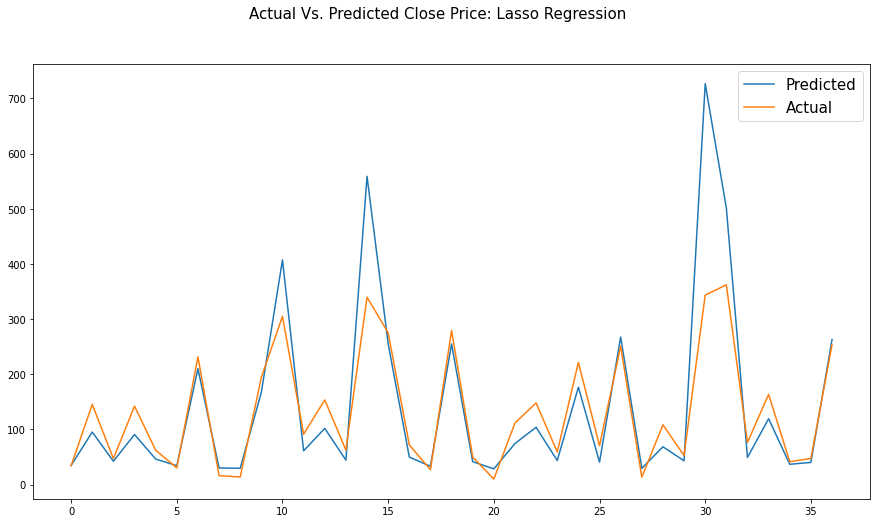

In [ ]:
# Visualizing evaluation Metric Score chart
#Plotting Actual vs Predicted for Lasso Regression
plt.figure(figsize=(15,8))
plt.plot(10**y_lasso_pred)
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=15)
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression', fontsize=15)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

# **Cross-Validation**

**Cross validation (CV)** is one of the technique used to test the effectiveness of a machine learning models by dividing data into two segments: one used to learn or train a model and the other used to validate the model.If the model performs well over the test data and gives good accuracy, it means the model hasn’t overfitted the training data and can be used for prediction.
It is also a re-sampling procedure used to evaluate a model if we have a limited data.


In [ ]:
#Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV
lasso_cv=Lasso()
parameters={'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor=GridSearchCV(lasso_cv,parameters,scoring='neg_mean_squared_error',cv=3)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.03568704115012387


In [ ]:
#Prediction
y_lasso_pred1=lasso_regressor.predict(X_test)
y_lasso_pred1

array([1.54354487, 1.97567456, 1.62805161, 1.95536093, 1.66663101,
       1.53726954, 2.31487766, 1.48298051, 1.47326009, 2.2171565 ,
       2.59844512, 1.78642579, 2.00479609, 1.64813205, 2.73387119,
       2.39848628, 1.69901916, 1.52339302, 2.39783687, 1.61968181,
       1.45716418, 1.87029807, 2.01296612, 1.64002076, 2.24023643,
       1.61193498, 2.41832437, 1.47218292, 1.83472159, 1.63600917,
       2.84646779, 2.68741427, 1.69340707, 2.07291386, 1.56848035,
       1.60563948, 2.41082101])

In [ ]:
#Test performance of Lasso after Cross-Validation
print("MSE value is :",round(mean_squared_error(y_test, y_lasso_pred1), 4))
print("RMSE value is :",round(math.sqrt(mean_squared_error(y_test, y_lasso_pred1)),4))
print("MAE value is :",round(mean_absolute_error(y_test, y_lasso_pred1),4))
print("MAPE value is :",round(mean_absolute_percentage_error(y_test, y_lasso_pred1),4))
print("r2 score is :",round(r2_score(y_test, y_lasso_pred1), 4))

MSE value is : 0.0315
RMSE value is : 0.1775
MAE value is : 0.1459
MAPE value is : 0.0877
r2 score is : 0.8308


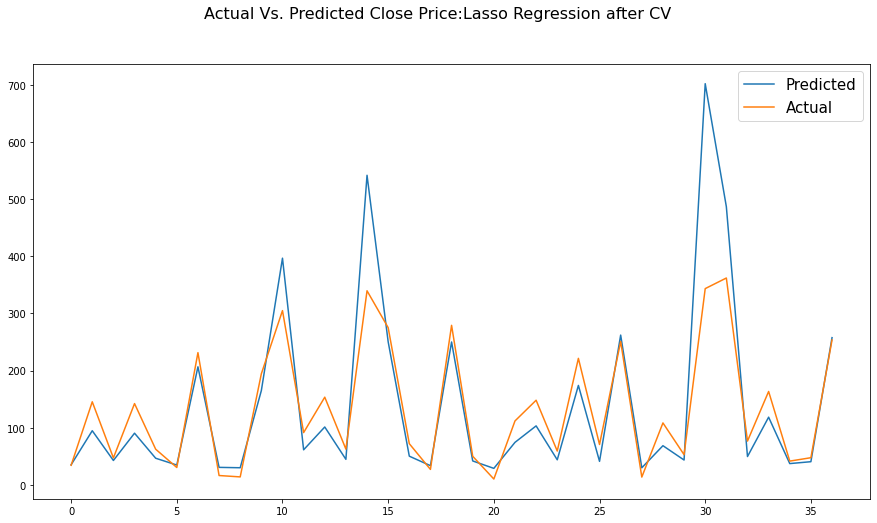

In [ ]:
#Plotting Actual vs Predicted for Lasso after Cross-Validation
plt.figure(figsize=(15,8))
plt.plot(10**y_lasso_pred1)
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=15)
plt.suptitle('Actual Vs. Predicted Close Price:Lasso Regression after CV', fontsize=16)  #CV=Cross Validation
plt.show()


##### Which hyperparameter optimization technique have you used and why?

**Here we used GridSearchCV.GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered. After extracting the best parameter values, predictions are made.**

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

 **All the evaluation matrics improved slightly after cross validation**

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 RIDGE REGRESSION

**Ridge regression** is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values. 

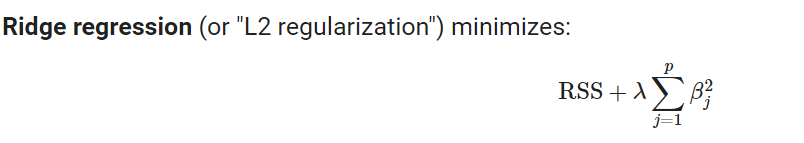

1. A tiny  λ  imposes no penalty on the coefficient size, and is equivalent to a normal linear regression.
2. Increasing  λ  penalizes the coefficients and thus shrinks them towards zero.

In [ ]:
#Implementing Ridge Regression
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)


Ridge(alpha=0.1)

In [ ]:
#Checking the training accuracy of Ridge Regression
round(ridge.score(X_train,y_train),2)

0.81

In [ ]:
#Prediction
y_ridge_pred=ridge.predict(X_test)
y_ridge_pred

array([1.53352283, 1.96910415, 1.61255121, 1.95652033, 1.66650856,
       1.532539  , 2.32135073, 1.47284457, 1.46234918, 2.2642429 ,
       2.60125072, 1.77432264, 2.00563526, 1.64078218, 2.73982133,
       2.44164363, 1.69497549, 1.51606007, 2.44598236, 1.61235674,
       1.44601757, 1.87417277, 2.01601499, 1.63754549, 2.25447469,
       1.63003422, 2.42697704, 1.46098673, 1.83245141, 1.62441996,
       2.87971761, 2.76450779, 1.69515965, 2.07321729, 1.56181912,
       1.59739773, 2.42341647])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#Checking the test performance of Ridge Regression Using Evaluation MAtrics
print("MSE value is :",round(mean_squared_error(y_test, y_ridge_pred), 4))
print("RMSE value is :",round(math.sqrt(mean_squared_error(y_test, y_ridge_pred)),4))
print("MAE value is :",round(mean_absolute_error(y_test, y_ridge_pred),4))
print("MAPE value is :",round(mean_absolute_percentage_error(y_test, y_ridge_pred),4))
print("r2 score is :",round(r2_score(y_test, y_ridge_pred), 4))

MSE value is : 0.0319
RMSE value is : 0.1786
MAE value is : 0.1453
MAPE value is : 0.0869
r2 score is : 0.8288


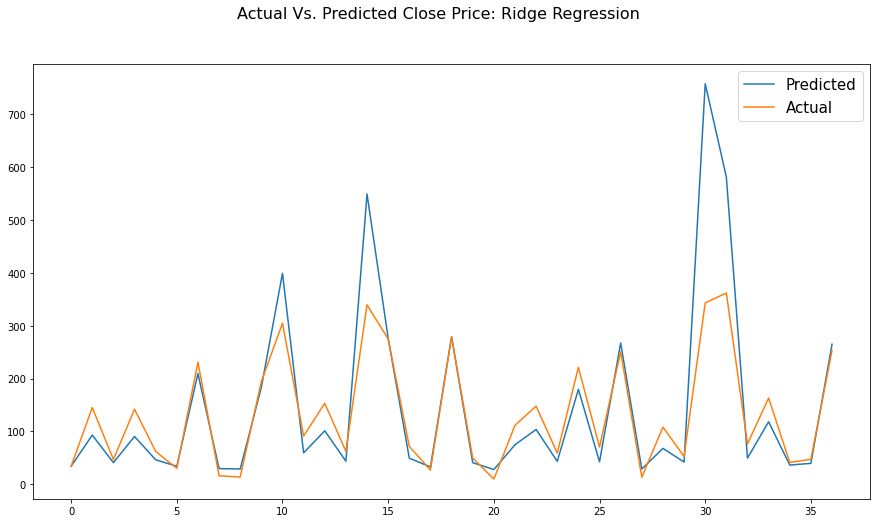

In [ ]:
# Visualizing evaluation Metric Score chart
#Plotting Actual vs Predicted for Ridge Regression
plt.figure(figsize=(15,8))
plt.plot(10**y_ridge_pred)
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=15)
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression', fontsize=16)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#CrossValidation 
#Hyperparameter Tunning
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :",ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -0.03558908264931505


In [ ]:
#Prediction after CV
y_ridge_pred1=ridge_regressor.predict(X_test)
y_ridge_pred1

array([1.53694649, 1.97880904, 1.62345152, 1.95842907, 1.66350981,
       1.53097617, 2.32637033, 1.47492997, 1.46493911, 2.23085678,
       2.61598601, 1.78539004, 2.0089461 , 1.64398148, 2.75395632,
       2.41557251, 1.69618453, 1.51650618, 2.4154911 , 1.61501631,
       1.44853734, 1.87206598, 2.0184214 , 1.63608772, 2.2506674 ,
       1.61034145, 2.43314212, 1.46380222, 1.83506034, 1.63142241,
       2.87250347, 2.71424245, 1.69110404, 2.07878676, 1.56265882,
       1.60047479, 2.42461498])

In [ ]:
#Checking the test performance of Ridge Regression after CrossValidation Using Evaluation MAtrics
print("MSE value is :",round(mean_squared_error(y_test, y_ridge_pred1), 4))
print("RMSE value is :",round(math.sqrt(mean_squared_error(y_test, y_ridge_pred1)),4))
print("MAE value is :",round(mean_absolute_error(y_test, y_ridge_pred1),4))
print("MAPE value is :",round(mean_absolute_percentage_error(y_test, y_ridge_pred1),4))
print("r2 score is :",round(r2_score(y_test, y_ridge_pred1), 4))

MSE value is : 0.0317
RMSE value is : 0.1781
MAE value is : 0.1464
MAPE value is : 0.0874
r2 score is : 0.8298


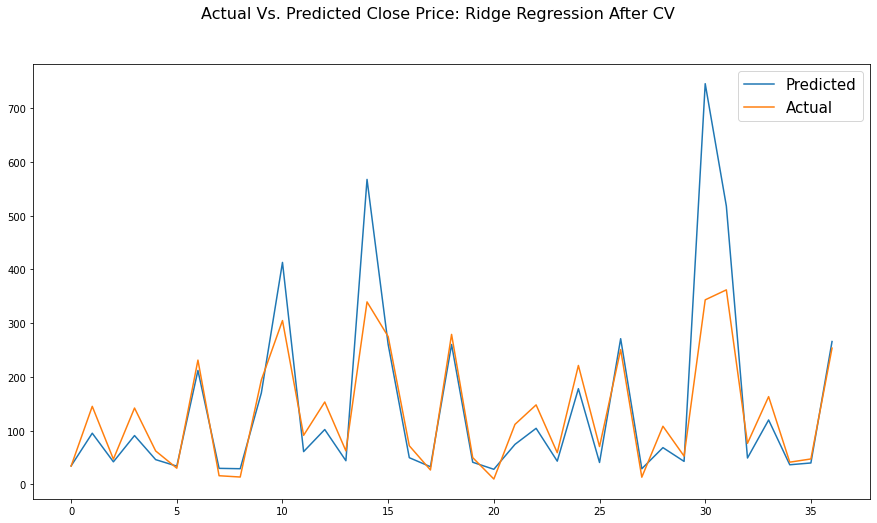

In [ ]:
#Plotting Actual vs Predicted for Ridge Regression after CrossValidation
plt.figure(figsize=(15,8))
plt.plot(10**y_ridge_pred1)
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=15)
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression After CV', fontsize=16)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

**We used GridSearchCV here**

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**All the evaluation metrics improved slightly after cross validation**

# ML MODEL 4. ELASTIC NET REGRESSION

**Elastic net linear regression** uses the penalties from both the lasso and ridge techniques to regularize regression models. The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regularization of statistical models.

In [ ]:
#Implementing Elastic Net Regression
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
from sklearn.linear_model import ElasticNet
elasticNet_reg=ElasticNet(alpha=0.1,l1_ratio=0.5)
elasticNet_reg.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
#Checking training accuracy of ElasticNet Regression
round(elasticNet_reg.score(X_train,y_train),2)

0.79

In [ ]:
#Prediction
y_elasticNet_pred=elasticNet_reg.predict(X_test)
y_elasticNet_pred

array([1.57832338, 1.95872177, 1.66259408, 1.93287953, 1.68009622,
       1.56907929, 2.24878761, 1.52365881, 1.51564978, 2.14266165,
       2.50398342, 1.79886232, 1.97715371, 1.66854794, 2.61552974,
       2.30374346, 1.71065791, 1.55793105, 2.30121353, 1.64429067,
       1.50215818, 1.85868505, 1.99150587, 1.65785292, 2.17653104,
       1.62998144, 2.34701052, 1.51478086, 1.83017993, 1.6624423 ,
       2.70736305, 2.54149096, 1.70321084, 2.04043081, 1.59762219,
       1.63142695, 2.32669362])

In [ ]:
#Checking the test performance of ElasticNet Regression Using Evaluation MAtrics
print("MSE value is :",round(mean_squared_error(y_test, y_elasticNet_pred), 4))
print("RMSE value is :",round(math.sqrt(mean_squared_error(y_test, y_elasticNet_pred)),4))
print("MAE value is :",round(mean_absolute_error(y_test, y_elasticNet_pred),4))
print("MAPE value is :",round(mean_absolute_percentage_error(y_test, y_elasticNet_pred),4))
print("r2 score is :",round(r2_score(y_test, y_elasticNet_pred), 4))

MSE value is : 0.0344
RMSE value is : 0.1854
MAE value is : 0.1514
MAPE value is : 0.0924
r2 score is : 0.8155


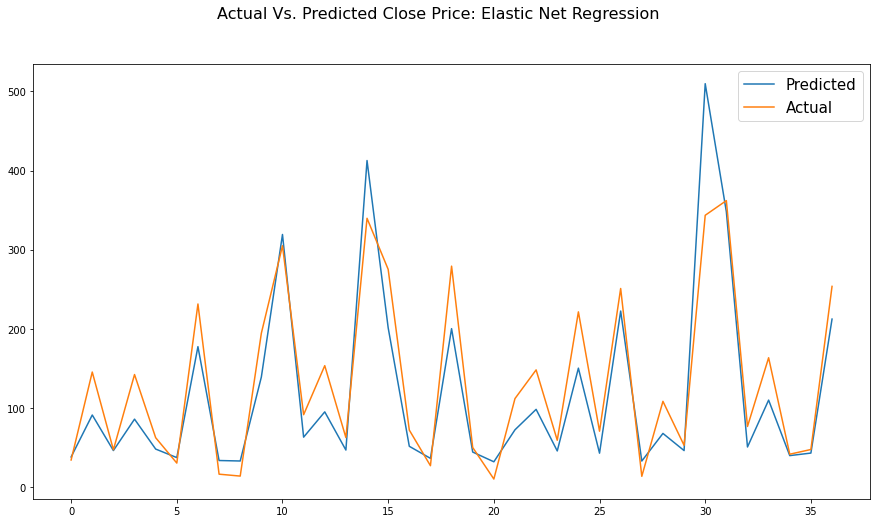

In [ ]:
#Plotting Actual vs Predicted for ElasticNet Regression 
plt.figure(figsize=(15,8))
plt.plot(10**y_elasticNet_pred)
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=15)
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net Regression', fontsize=16)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#Implementing CV
elastic=ElasticNet()
parameters={'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regg=GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=5)
elastic_regg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regg.best_params_)
print("\nUsing ",elastic_regg.best_params_, " the negative mean squared error is: ", elastic_regg.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.4}

Using  {'alpha': 0.01, 'l1_ratio': 0.4}  the negative mean squared error is:  -0.035175174587682684


In [ ]:
#Prediction
y_pred_elastic=elastic_regg.predict(X_test)
y_pred_elastic

array([1.53992109, 1.97782393, 1.62630912, 1.95690927, 1.66460482,
       1.53356366, 2.32138228, 1.47840038, 1.46855824, 2.22354521,
       2.6089308 , 1.78657583, 2.00703956, 1.64583022, 2.74532678,
       2.40698765, 1.69730834, 1.51941087, 2.406536  , 1.61712975,
       1.45232853, 1.87112221, 2.01648606, 1.63759669, 2.24564847,
       1.61067081, 2.42730379, 1.46745131, 1.83489743, 1.63377066,
       2.86093288, 2.70051856, 1.69183362, 2.07641239, 1.5651301 ,
       1.60275628, 2.41822876])

In [ ]:
#Checking the test performance of ElasticNet Regression after CrossValidation Using Evaluation MAtrics
print("MSE value is :",round(mean_squared_error(y_test, y_pred_elastic), 4))
print("RMSE value is :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic)),4))
print("MAE value is :",round(mean_absolute_error(y_test, y_pred_elastic),4))
print("MAPE value is :",round(mean_absolute_percentage_error(y_test, y_pred_elastic),4))
print("r2 score is :",round(r2_score(y_test, y_pred_elastic), 4))

MSE value is : 0.0316
RMSE value is : 0.1778
MAE value is : 0.1462
MAPE value is : 0.0876
r2 score is : 0.8304


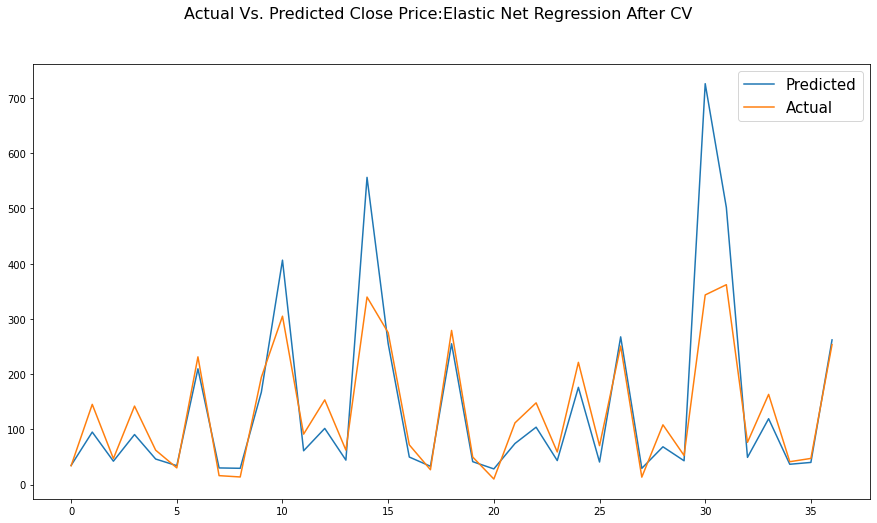

In [ ]:
#Plotting Actual vs Predicted for ElasticNet Regression after CrossValidation
plt.figure(figsize=(15,8))
plt.plot(10**y_pred_elastic)
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=15)
plt.suptitle('Actual Vs. Predicted Close Price:Elastic Net Regression After CV', fontsize=16)
plt.show()

# **ML MODEL 5.XG Boost Regression**
XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

In [ ]:
#Implementing XG Boost Regression.
from xgboost import XGBRegressor
xgb_regg=XGBRegressor()
xgb_regg.fit(X_train,y_train)

[09:40:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
#Checking the training accuracy of XGBoost Regression
xgb_regg.score(X_train,y_train)

0.9988518038974593

In [ ]:
#Prediction
y_xgb_pred=xgb_regg.predict(X_test)
y_xgb_pred

array([1.5175332, 2.1898632, 1.6477574, 2.1553931, 1.8369774, 1.4882216,
       2.371214 , 1.2706656, 1.113492 , 2.309568 , 2.4876823, 1.9917736,
       2.1898632, 1.7714514, 2.5409272, 2.38736  , 1.8603005, 1.4387183,
       2.38736  , 1.716477 , 1.0367959, 2.1397736, 2.1970944, 1.7723364,
       2.3743093, 1.607457 , 2.4338627, 1.0982392, 2.0333424, 1.7378185,
       2.5434027, 2.499113 , 1.8437052, 2.2332416, 1.5977343, 1.7151084,
       2.4346526], dtype=float32)

In [ ]:
#Checking the test performance of XGBoost Regression Using Evaluation MAtrics
print("MSE value is :",round(mean_squared_error(y_test, y_xgb_pred), 4))
print("RMSE value is :",round(math.sqrt(mean_squared_error(y_test,y_xgb_pred)),4))
print("MAE value is :",round(mean_absolute_error(y_test, y_xgb_pred),4))
print("MAPE value is :",round(mean_absolute_percentage_error(y_test, y_xgb_pred),4))
print("r2 score is :",round(r2_score(y_test, y_xgb_pred), 4))

MSE value is : 0.0026
RMSE value is : 0.0512
MAE value is : 0.0318
MAPE value is : 0.0175
r2 score is : 0.9859


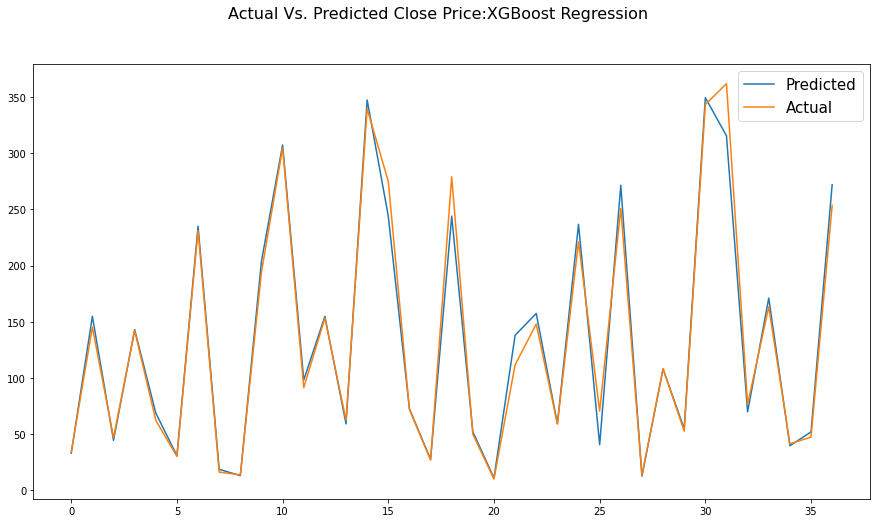

In [ ]:
#Plotting Actual vs Predicted for XGBoost Regression
plt.figure(figsize=(15,8))
plt.plot(10**y_xgb_pred)  
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=15)
plt.suptitle('Actual Vs. Predicted Close Price:XGBoost Regression', fontsize=16)
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

xG boost regression is with good evaluation metric scores.

# **Conclusion**

*   Stock Price prediction with the help of Machine Learning models is less time consuming and also it gives good performance.

*   Stock price was continuously increasing till 2018 after that it decreases due to fraud case of Rana Kapoor.
*   All independent variables (Open,High& Low) are extremely correlated with dependent variable(Close).
*   All independent variables are highly correlated with each other(Multicollinearity)

*   Distribution of all independent and dependent variables was right skewed and after log transformation it became Normal.

*   I have compared 5 models(**Linear Regression,Lasso Regression, Ridge Regression, Elastic Net Regression, and XGBoost Regression**) on the basis of **RMSE** and **MAPE**.
*   **RMSE** and **MAPE** are mostly used  as evaluatuion metrics to measure **forecast accuracy**.

*  **XGBoost Regression** is best model among all five models with lowest **RMSE=0.0512**, and **MAPE=0.0175** than other models and also it has highest **r2 score**(**r2 score=0.9859**) than other models.


